# Modelamiento

Se importan las librerías necesarias

In [25]:
import os
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Se establece la ruta del directorio de la aplicación.

In [26]:
APP_HOME="C:/Users/arcem/Downloads/Proyecto analítica"

Se intenta importar la librería mlflow y si no está instalada, se instala.

In [27]:
try: 
    import mlflow
except:
    os.system("pip install mlflow")
    import mlflow
import mlflow.sklearn

Se cambia el directorio de trabajo al directorio de la aplicación.


In [28]:
os.chdir(APP_HOME)

Se listan los archivos del directorio y se lee el archivo CSV llamado 'Pacifico_cleaned.csv' y se muestra una muestra aleatoria de 15 filas del DataFrame.

In [29]:
os.listdir()
puntajes_pacifico=pd.read_csv('Pacifico_cleaned.csv')
puntajes_pacifico.sample(15)

,periodo,estu_consecutivo,cole_area_ubicacion,cole_calendario,cole_naturaleza,estu_genero,fami_cuartoshogar,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,...,padre_Primaria incompleta,padre_Secundaria (Bachillerato) completa,padre_Secundaria (Bachillerato) incompleta,padre_Técnica o tecnológica completa,padre_Técnica o tecnológica incompleta,nivel_ing_A-,nivel_ing_A1,nivel_ing_A2,nivel_ing_B+,nivel_ing_B1
141257,20152,SB11201520363704,1,1,1,1,4,2,4,1,...,0,1,0,0,0,0,1,0,0,0
136501,20142,SB11201420424458,1,1,1,0,3,1,6,0,...,1,0,0,0,0,1,0,0,0,0
24660,20162,SB11201620189734,1,1,1,0,2,2,4,0,...,0,1,0,0,0,0,0,1,0,0
1191,20152,SB11201520177437,1,1,1,1,2,1,5,0,...,0,0,0,1,0,0,0,1,0,0
51525,20162,SB11201620568439,1,1,1,0,3,3,5,0,...,0,0,0,0,1,0,1,0,0,0
179479,20152,SB11201520373975,0,1,1,1,3,1,3,0,...,0,0,0,0,0,1,0,0,0,0
102189,20152,SB11201520235550,1,1,1,0,2,2,3,0,...,0,0,0,0,0,0,0,0,1,0
46496,20152,SB11201520450322,1,1,1,1,5,1,6,0,...,0,1,0,0,0,1,0,0,0,0
197351,20162,SB11201620048609,1,1,1,0,3,2,5,0,...,0,0,0,0,0,0,1,0,0,0
207511,20152,SB11201520574060,1,1,1,0,3,1,6,0,...,1,0,0,0,0,0,1,0,0,0


Se muestran los nombres de las columnas del DataFrame 'puntajes_pacifico'.


In [30]:
puntajes_pacifico.columns

Index(['periodo', 'estu_consecutivo', 'cole_area_ubicacion', 'cole_calendario',
       'cole_naturaleza', 'estu_genero', 'fami_cuartoshogar',
       'fami_estratovivienda', 'fami_personashogar', 'fami_tieneautomovil',
       'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora',
       'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas',
       'punt_c_naturales', 'punt_lectura_critica', 'punt_global', 'tier',
       'edad', 'caracter_ACADÉMICO', 'caracter_TÉCNICO',
       'caracter_TÉCNICO/ACADÉMICO', 'cole_depto_ubi_CAUCA',
       'cole_depto_ubi_CHOCO', 'cole_depto_ubi_NARIÑO', 'cole_depto_ubi_VALLE',
       'generoCole_FEMENINO', 'generoCole_MASCULINO', 'generoCole_MIXTO',
       'jornada_COMPLETA', 'jornada_MAÑANA', 'jornada_NOCHE',
       'jornada_SABATINA', 'jornada_TARDE', 'jornada_UNICA',
       'madre_Educación profesional completa',
       'madre_Educación profesional incompleta', 'madre_Ninguno',
       'madre_No sabe', 'madre_Postgrado', 'madre_Prima

Se muestra la cantidad de filas del DataFrame 'puntajes_pacifico'.


In [31]:
len(puntajes_pacifico)

237382


### Análisis de correlaciones
Pregunta descriptiva 

¿Cuáles son los factores socioeconómicos que más influyen en el puntaje global de las pruebas Saber 11 en los departamentos del Pacífico entre 2014 y 2016?


In [69]:
import pandas as pd
import plotly.express as px

def plot_punt_global_correlations(df=puntajes_pacifico):

    numerical_df = df.select_dtypes(include=['float64', 'int64'])
    
    columns_to_exclude = [col for col in numerical_df.columns if col.startswith('punt_') and col != 'punt_global']
    numerical_df = numerical_df.drop(columns=columns_to_exclude)
    
    correlations = numerical_df.corr()['punt_global'].drop('punt_global').sort_values(ascending=False)
    
    corr_df = correlations.reset_index()
    corr_df.columns = ['Variable', 'Correlation']
    
    corr_df['Sign'] = corr_df['Correlation'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
    
    fig = px.bar(corr_df, x='Correlation', y='Variable', orientation='h',
                 color='Sign', color_discrete_map={'Positive': 'blue', 'Negative': 'red'},
                 title='Pearson Correlation with punt_global',
                 labels={'Correlation': 'Pearson Correlation', 'Variable': 'Variables'})
    
    fig.update_layout(yaxis={'categoryorder': 'total ascending'}, height=1000, width=1200)
    
    fig.show()

plot_punt_global_correlations()


In [70]:
# Nueva celda: Imprimir los valores de las correlaciones

def print_punt_global_correlations(df=puntajes_pacifico):
    # Filtrar el DataFrame para incluir solo parámetros numéricos
    numerical_df = df.select_dtypes(include=['float64', 'int64'])
    
    # Excluir columnas que son puntajes específicos (comenzando con 'punt_' pero no 'punt_global')
    columns_to_exclude = [col for col in numerical_df.columns if col.startswith('punt_') and col != 'punt_global']
    numerical_df = numerical_df.drop(columns=columns_to_exclude)
    
    # Calcular la correlación de Pearson del puntaje global con todas las demás variables
    correlations = numerical_df.corr()['punt_global'].drop('punt_global').sort_values(ascending=False)
    
    # Imprimir las correlaciones
    print("Correlaciones con punt_global:")
    print(correlations)

print_punt_global_correlations()


Correlaciones con punt_global:
tier                                          0.542168
nivel_ing_A2                                  0.362564
nivel_ing_B1                                  0.356193
fami_estratovivienda                          0.337457
fami_tieneinternet                            0.273464
fami_tienecomputador                          0.268325
fami_tieneautomovil                           0.200195
madre_Educación profesional completa          0.196864
padre_Educación profesional completa          0.192609
fami_tienelavadora                            0.178537
nivel_ing_B+                                  0.174515
cole_area_ubicacion                           0.152555
madre_Técnica o tecnológica completa          0.141996
nivel_ing_A1                                  0.141180
padre_Postgrado                               0.138453
madre_Postgrado                               0.130493
jornada_MAÑANA                                0.127640
padre_Técnica o tecnológica comple

In [84]:
variables_relevantes = [
    'fami_estratovivienda', 'fami_tieneinternet', 'fami_tienecomputador',
    'fami_tieneautomovil', 'madre_Educación profesional completa', 
    'padre_Educación profesional completa', 'fami_tienelavadora', 'punt_global'
]

data = puntajes_pacifico[variables_relevantes]

X = data.drop(['punt_global'], axis=1)
y = data['punt_global']

input_scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = input_scaler.fit_transform(X)

response_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = response_scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [88]:
def train_and_log_model(epochs, hidden_layer_size):
    # Define la arquitectura del modelo
    model = Sequential()
    model.add(Dense(40, activation='relu', kernel_initializer='uniform', input_shape=(X_train.shape[1],)))
    model.add(Dense(hidden_layer_size, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # Compila el modelo
    optimizer = optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

    # Entrena el modelo
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_split=0.2)

    # Calcula las predicciones y las métricas
    predictions_scaled = model.predict(X_test)
    predictions = scaler_y.inverse_transform(predictions_scaled).flatten()
    y_test_actual = scaler_y.inverse_transform(y_test).flatten()

    mse = mean_squared_error(y_test_actual, predictions)
    r2 = r2_score(y_test_actual, predictions)

    # Registra el modelo y las métricas con MLflow
    with mlflow.start_run():
        params = {
            'epochs': epochs,
            'hidden_layer_size': hidden_layer_size,
            'learning_rate': 0.01
        }
        mlflow.log_params(params)

        mlflow.log_metric('MSE', mse)
        mlflow.log_metric('R2 Score', r2)

        mlflow.keras.log_model(model, 'model')

    return mse, r2

# Realiza experimentos con diferentes configuraciones de epochs y hidden_layer_size
epochs_list = [10, 50, 100]
hidden_layer_sizes = [100, 200, 300]

best_mse = float('inf')
best_r2 = float('-inf')
best_config_mse = None
best_config_r2 = None

for epochs in epochs_list:
    for hidden_layer_size in hidden_layer_sizes:
        mse, r2 = train_and_log_model(epochs, hidden_layer_size)
        
        # Actualiza la mejor configuración para MSE
        if mse < best_mse:
            best_mse = mse
            best_config_mse = {'epochs': epochs, 'hidden_layer_size': hidden_layer_size}
        
        # Actualiza la mejor configuración para R2 Score
        if r2 > best_r2:
            best_r2 = r2
            best_config_r2 = {'epochs': epochs, 'hidden_layer_size': hidden_layer_size}

print('Mejor configuración para MSE:', best_config_mse)
print('Mejor configuración para R2 Score:', best_config_r2)
print('MSE correspondiente:', best_mse)
print('R2 Score correspondiente:', best_r2)

1484/1484 [==============================] - 1s 745us/step


2024/05/28 22:19:46 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmp0i6mu1f3\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmp0i6mu1f3\model\data\model\assets


1484/1484 [==============================] - 1s 699us/step


2024/05/28 22:20:40 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmprxh0accp\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmprxh0accp\model\data\model\assets


1484/1484 [==============================] - 1s 710us/step


2024/05/28 22:21:34 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpquuwd5jd\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpquuwd5jd\model\data\model\assets


1484/1484 [==============================] - 1s 707us/step


2024/05/28 22:25:19 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpm_sswguw\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpm_sswguw\model\data\model\assets


1484/1484 [==============================] - 1s 752us/step


2024/05/28 22:29:10 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmphh7nz6n7\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmphh7nz6n7\model\data\model\assets


1484/1484 [==============================] - 1s 685us/step


2024/05/28 22:32:58 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpvrgzof2c\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpvrgzof2c\model\data\model\assets


Se seleccionan las columnas del DataFrame 'puntajes_pacifico' que contienen la palabra "punt" en su nombre.

In [33]:
puntajes_pacifico[[_ for _ in puntajes_pacifico.columns if re.search("punt",_)]]

,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
0,50.0,53.0,37.0,47.0,42.0,227.0
1,52.0,52.0,55.0,57.0,52.0,270.0
2,60.0,70.0,60.0,64.0,58.0,314.0
3,38.0,45.0,43.0,41.0,26.0,193.0
4,41.0,34.0,24.0,45.0,44.0,185.0
...,...,...,...,...,...,...
237377,41.0,39.0,49.0,45.0,38.0,213.0
237378,41.0,26.0,34.0,42.0,32.0,170.0
237379,56.0,42.0,39.0,50.0,52.0,233.0
237380,59.0,51.0,59.0,28.0,56.0,247.0


Histograma de la variable 'punt_global' del DataFrame 'puntajes_pacifico'.

<Axes: >

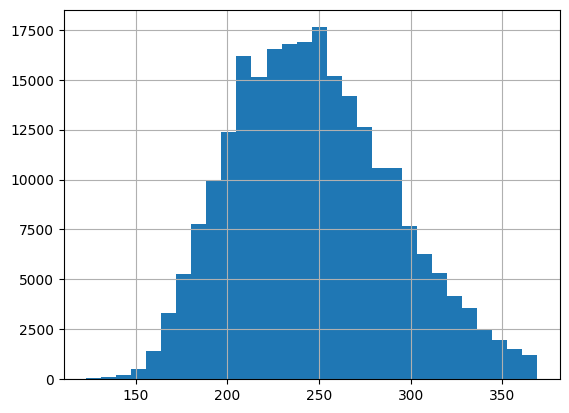

In [34]:
puntajes_pacifico["punt_global"].hist(bins=30)

Se seleccionan las columnas del DataFrame 'puntajes_pacifico' que contienen la palabra "punt" en su nombre y se almacenan en la lista 'puntajes_cols'.

In [35]:
 puntajes_cols=[_ for _ in puntajes_pacifico.columns if re.search("punt",_)]
 puntajes_cols

['punt_ingles',
 'punt_matematicas',
 'punt_sociales_ciudadanas',
 'punt_c_naturales',
 'punt_lectura_critica',
 'punt_global']

Copia del DataFrame 'puntajes_pacifico'. Se eliminan del DataFrame las columnas de puntajes y la columna 'estu_consecutivo'.


In [36]:
data=puntajes_pacifico.copy()
X = data.drop( puntajes_cols+["estu_consecutivo"], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237382 entries, 0 to 237381
Data columns (total 57 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   periodo                                     237382 non-null  int64  
 1   cole_area_ubicacion                         237382 non-null  int64  
 2   cole_calendario                             237382 non-null  int64  
 3   cole_naturaleza                             237382 non-null  int64  
 4   estu_genero                                 237382 non-null  int64  
 5   fami_cuartoshogar                           237382 non-null  int64  
 6   fami_estratovivienda                        237382 non-null  int64  
 7   fami_personashogar                          237382 non-null  int64  
 8   fami_tieneautomovil                         237382 non-null  int64  
 9   fami_tienecomputador                        237382 non-null  int64  
 

Se define la variable 'y' como la columna 'punt_global' del DataFrame 'data'.

In [37]:
y = data['punt_global']

Se establece la dirección del servidor de MLflow.


In [38]:
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:8000")

### Entrenamiento del modelo de predicción
Pregunta Predictiva

¿Cómo se ve afectado el puntaje global al reducirse la brecha de calidad educativa entre los colegios de los departamentos del Pacífico entre 2014 y 2016, considerando los diferentes estratos socioeconómicos?


In [40]:
import mlflow
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlflow.end_run()

mlflow.start_run()

params = {
    "epochs": 1,

    "hidden_layer_size": 50,
    "embedding_layer_size": 20,
    
    "neuron_activation": "relu",
    "weight_init": "uniform",
    "learning_rate": 0.01
}
mlflow.log_params(params)

input_scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled_train = input_scaler.fit_transform(X_train)
x_scaled_test = input_scaler.transform(X_test)

y_train = y_train.to_numpy().reshape(-1, 1)  
response_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled_train = response_scaler.fit_transform(y_train)

model = Sequential()
model.add(Dense(params['embedding_layer_size'], activation=params['neuron_activation'],
                kernel_initializer=params['weight_init'], input_shape=(x_scaled_train.shape[1],)))
model.add(Dense(params['hidden_layer_size'], activation=params['neuron_activation']))
model.add(Dense(1, activation="linear"))

optimizer = optimizers.Adam(learning_rate=params['learning_rate'])
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mean_squared_error"])

history = model.fit(x_scaled_train, y_scaled_train, epochs=params['epochs'], verbose=1)

predictions_scaled = model.predict(x_scaled_test)
predictions = response_scaler.inverse_transform(predictions_scaled).flatten()

r2_out_of_sample = r2_score(y_test, predictions)  
mlflow.log_metric("R2_out_of_sample", r2_out_of_sample)

mlflow.keras.log_model(model, "model")

print("R2 Score:", r2_out_of_sample)

mlflow.end_run()

1484/1484 [==============================] - 1s 687us/step


2024/05/28 19:10:52 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpyhrk1ic1\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpyhrk1ic1\model\data\model\assets


R2 Score: 0.5448756298114954


Ahora se realizan los experimentos para los cuales se propusieron cambios ne la arquitectura del modelo

In [41]:
import mlflow
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled_train = input_scaler.fit_transform(X_train)
x_scaled_test = input_scaler.transform(X_test)

y_train = y_train.to_numpy().reshape(-1, 1)  
response_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled_train = response_scaler.fit_transform(y_train)

embedding_sizes = [10, 20, 30, 40]
intermediate_sizes = [50, 100, 150, 200]
epochs = 10  

for embedding_size in embedding_sizes:
    for intermediate_size in intermediate_sizes:
        with mlflow.start_run():
            params = {
                "epochs": epochs,
                "embedding_layer_size": embedding_size,
                "hidden_layer_size": intermediate_size,
                "neuron_activation": "relu",
                "weight_init": "uniform",
                "learning_rate": 0.01
            }
            mlflow.log_params(params)

            model = Sequential()
            model.add(Dense(embedding_size, activation=params['neuron_activation'],
                            kernel_initializer=params['weight_init'], input_shape=(x_scaled_train.shape[1],)))
            model.add(Dense(intermediate_size, activation=params['neuron_activation']))
            model.add(Dense(1, activation="linear"))

            optimizer = optimizers.Adam(learning_rate=params['learning_rate'])
            model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mean_squared_error"])

            history = model.fit(x_scaled_train, y_scaled_train, epochs=epochs, verbose=1)

            predictions_scaled = model.predict(x_scaled_test)
            predictions = response_scaler.inverse_transform(predictions_scaled).flatten()

            r2_out_of_sample = r2_score(y_test, predictions)  
            mlflow.log_metric("R2_out_of_sample", r2_out_of_sample)

            mlflow.keras.log_model(model, "model")

            mlflow.end_run()


Epoch 1/10
5935/5935 [==============================] - 5s 842us/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 2/10
5935/5935 [==============================] - 5s 828us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 3/10
5935/5935 [==============================] - 5s 828us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 4/10
5935/5935 [==============================] - 5s 814us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 5/10
5935/5935 [==============================] - 5s 833us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 6/10
5935/5935 [==============================] - 5s 827us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 7/10
5935/5935 [==============================] - 5s 835us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 8/10
5935/5935 [==============================] - 5s 820us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 9/10
5935/5935 [==============================] - 5s 829us/step - loss: 0.0140 - m

2024/05/28 19:17:07 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmp4yqcauav\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmp4yqcauav\model\data\model\assets


Epoch 1/10
5935/5935 [==============================] - 5s 834us/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 2/10
5935/5935 [==============================] - 5s 857us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 3/10
5935/5935 [==============================] - 5s 846us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 4/10
5935/5935 [==============================] - 5s 856us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 5/10
5935/5935 [==============================] - 5s 843us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 6/10
5935/5935 [==============================] - 5s 850us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 7/10
5935/5935 [==============================] - 5s 830us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 8/10
5935/5935 [==============================] - 5s 838us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 9/10
5935/5935 [==============================] - 5s 836us/step - loss: 0.0142 - m

2024/05/28 19:18:06 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpo9fbm7vc\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpo9fbm7vc\model\data\model\assets


Epoch 1/10
5935/5935 [==============================] - 5s 829us/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 2/10
5935/5935 [==============================] - 5s 826us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 3/10
5935/5935 [==============================] - 5s 841us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 4/10
5935/5935 [==============================] - 5s 833us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 5/10
5935/5935 [==============================] - 5s 837us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 6/10
5935/5935 [==============================] - 5s 815us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 7/10
5935/5935 [==============================] - 5s 827us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 8/10
5935/5935 [==============================] - 5s 826us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 9/10
5935/5935 [==============================] - 5s 836us/step - loss: 0.0140 - m

2024/05/28 19:19:03 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmp5ibto6y7\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmp5ibto6y7\model\data\model\assets


Epoch 1/10
5935/5935 [==============================] - 5s 836us/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 2/10
5935/5935 [==============================] - 5s 839us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 3/10
5935/5935 [==============================] - 5s 838us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 4/10
5935/5935 [==============================] - 5s 838us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 5/10
5935/5935 [==============================] - 5s 834us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 6/10
5935/5935 [==============================] - 5s 844us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 7/10
5935/5935 [==============================] - 5s 831us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 8/10
5935/5935 [==============================] - 5s 837us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 9/10
5935/5935 [==============================] - 5s 851us/step - loss: 0.0141 - m

2024/05/28 19:20:02 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpvnalb39v\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpvnalb39v\model\data\model\assets


Epoch 1/10
5935/5935 [==============================] - 5s 824us/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 2/10
5935/5935 [==============================] - 5s 850us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 3/10
5935/5935 [==============================] - 5s 818us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 4/10
5935/5935 [==============================] - 5s 804us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 5/10
5935/5935 [==============================] - 5s 818us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 6/10
5935/5935 [==============================] - 5s 810us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 7/10
5935/5935 [==============================] - 5s 823us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 8/10
5935/5935 [==============================] - 5s 810us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 9/10
5935/5935 [==============================] - 5s 821us/step - loss: 0.0141 - m

2024/05/28 19:20:59 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpxt1ixu73\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpxt1ixu73\model\data\model\assets


Epoch 1/10
5935/5935 [==============================] - 5s 831us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2/10
5935/5935 [==============================] - 5s 835us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 3/10
5935/5935 [==============================] - 5s 826us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 4/10
5935/5935 [==============================] - 5s 864us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 5/10
5935/5935 [==============================] - 5s 830us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 6/10
5935/5935 [==============================] - 5s 837us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 7/10
5935/5935 [==============================] - 5s 826us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 8/10
5935/5935 [==============================] - 5s 833us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 9/10
5935/5935 [==============================] - 5s 821us/step - loss: 0.0140 - m

2024/05/28 19:21:56 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpewctqm2j\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpewctqm2j\model\data\model\assets


Epoch 1/10
5935/5935 [==============================] - 5s 839us/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 2/10
5935/5935 [==============================] - 5s 839us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 3/10
5935/5935 [==============================] - 5s 839us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 4/10
5935/5935 [==============================] - 5s 839us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 5/10
5935/5935 [==============================] - 5s 846us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 6/10
5935/5935 [==============================] - 5s 852us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 7/10
5935/5935 [==============================] - 5s 848us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 8/10
5935/5935 [==============================] - 5s 841us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 9/10
5935/5935 [==============================] - 5s 844us/step - loss: 0.0140 - m

2024/05/28 19:22:55 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpjbcmfm9l\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpjbcmfm9l\model\data\model\assets


Epoch 1/10
5935/5935 [==============================] - 5s 834us/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 2/10
5935/5935 [==============================] - 5s 827us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 3/10
5935/5935 [==============================] - 5s 851us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 4/10
5935/5935 [==============================] - 5s 853us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 5/10
5935/5935 [==============================] - 5s 823us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 6/10
5935/5935 [==============================] - 5s 846us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 7/10
5935/5935 [==============================] - 5s 844us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 8/10
5935/5935 [==============================] - 5s 838us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 9/10
5935/5935 [==============================] - 5s 846us/step - loss: 0.0141 - m

2024/05/28 19:23:53 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpjndtxmzw\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpjndtxmzw\model\data\model\assets


Epoch 1/10
5935/5935 [==============================] - 5s 824us/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 2/10
5935/5935 [==============================] - 5s 828us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 3/10
5935/5935 [==============================] - 5s 819us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 4/10
5935/5935 [==============================] - 5s 830us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 5/10
5935/5935 [==============================] - 5s 825us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 6/10
5935/5935 [==============================] - 5s 832us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 7/10
5935/5935 [==============================] - 5s 823us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 8/10
5935/5935 [==============================] - 5s 831us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 9/10
5935/5935 [==============================] - 5s 824us/step - loss: 0.0141 - m

2024/05/28 19:24:51 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpm8agl283\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpm8agl283\model\data\model\assets


Epoch 1/10
5935/5935 [==============================] - 5s 826us/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 2/10
5935/5935 [==============================] - 5s 834us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 3/10
5935/5935 [==============================] - 5s 834us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 4/10
5935/5935 [==============================] - 5s 823us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 5/10
5935/5935 [==============================] - 5s 838us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 6/10
5935/5935 [==============================] - 5s 846us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 7/10
5935/5935 [==============================] - 5s 846us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 8/10
5935/5935 [==============================] - 5s 818us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 9/10
5935/5935 [==============================] - 5s 835us/step - loss: 0.0140 - m

2024/05/28 19:25:49 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmp9bm7xlta\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmp9bm7xlta\model\data\model\assets


Epoch 1/10
5935/5935 [==============================] - 5s 852us/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 2/10
5935/5935 [==============================] - 5s 854us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 3/10
5935/5935 [==============================] - 5s 855us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 4/10
5935/5935 [==============================] - 5s 867us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 5/10
5935/5935 [==============================] - 5s 873us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 6/10
5935/5935 [==============================] - 5s 843us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 7/10
5935/5935 [==============================] - 5s 852us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 8/10
5935/5935 [==============================] - 5s 847us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 9/10
5935/5935 [==============================] - 5s 861us/step - loss: 0.0141 - m

2024/05/28 19:26:49 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmp_ps2a2bm\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmp_ps2a2bm\model\data\model\assets


Epoch 1/10
5935/5935 [==============================] - 5s 843us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2/10
5935/5935 [==============================] - 5s 853us/step - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 3/10
5935/5935 [==============================] - 5s 859us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 4/10
5935/5935 [==============================] - 5s 857us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 5/10
5935/5935 [==============================] - 5s 853us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 6/10
5935/5935 [==============================] - 5s 875us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 7/10
5935/5935 [==============================] - 5s 861us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 8/10
5935/5935 [==============================] - 5s 861us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 9/10
5935/5935 [==============================] - 5s 858us/step - loss: 0.0141 - m

2024/05/28 19:27:48 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmprck04ks0\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmprck04ks0\model\data\model\assets


Epoch 1/10
5935/5935 [==============================] - 6s 864us/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 2/10
5935/5935 [==============================] - 5s 836us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 3/10
5935/5935 [==============================] - 5s 844us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 4/10
5935/5935 [==============================] - 5s 827us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 5/10
5935/5935 [==============================] - 5s 845us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 6/10
5935/5935 [==============================] - 5s 835us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 7/10
5935/5935 [==============================] - 5s 839us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 8/10
5935/5935 [==============================] - 5s 842us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 9/10
5935/5935 [==============================] - 5s 829us/step - loss: 0.0140 - m

2024/05/28 19:28:46 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmp_q25y8ju\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmp_q25y8ju\model\data\model\assets


Epoch 1/10
5935/5935 [==============================] - 5s 853us/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 2/10
5935/5935 [==============================] - 5s 868us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 3/10
5935/5935 [==============================] - 5s 865us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 4/10
5935/5935 [==============================] - 5s 854us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 5/10
5935/5935 [==============================] - 5s 854us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 6/10
5935/5935 [==============================] - 5s 854us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 7/10
5935/5935 [==============================] - 5s 857us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 8/10
5935/5935 [==============================] - 5s 850us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 9/10
5935/5935 [==============================] - 5s 868us/step - loss: 0.0141 - m

2024/05/28 19:29:45 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpd7j41pm8\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpd7j41pm8\model\data\model\assets


Epoch 1/10
5935/5935 [==============================] - 6s 850us/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 2/10
5935/5935 [==============================] - 5s 867us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 3/10
5935/5935 [==============================] - 5s 866us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 4/10
5935/5935 [==============================] - 5s 867us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 5/10
5935/5935 [==============================] - 5s 883us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 6/10
5935/5935 [==============================] - 5s 849us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 7/10
5935/5935 [==============================] - 5s 870us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 8/10
5935/5935 [==============================] - 5s 902us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 9/10
5935/5935 [==============================] - 5s 899us/step - loss: 0.0140 - m

2024/05/28 19:30:46 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmphjppk1z2\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmphjppk1z2\model\data\model\assets


Epoch 1/10
5935/5935 [==============================] - 6s 956us/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 2/10
5935/5935 [==============================] - 6s 951us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 3/10
5935/5935 [==============================] - 6s 943us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 4/10
5935/5935 [==============================] - 6s 956us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 5/10
5935/5935 [==============================] - 6s 952us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 6/10
5935/5935 [==============================] - 6s 942us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 7/10
5935/5935 [==============================] - 6s 957us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 8/10
5935/5935 [==============================] - 6s 954us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 9/10
5935/5935 [==============================] - 6s 962us/step - loss: 0.0140 - m

2024/05/28 19:31:52 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpwzb_tx_s\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\arcem\AppData\Local\Temp\tmpwzb_tx_s\model\data\model\assets


Se busca el mejor resultado de ejecución utilizando MLflow. Se ordenan las ejecuciones por el puntaje R2 fuera de la muestra de manera descendente y se selecciona la mejor ejecución. Luego, se imprimen el ID de la mejor ejecución, el puntaje R2 y los detalles del modelo si hay una ejecución disponible. Si no se encuentra ninguna ejecución, se muestra un mensaje indicando que no se encontraron ejecuciones.


In [42]:
import mlflow


best_run = mlflow.search_runs(
    order_by=["metrics.R2_out_of_sample DESC"],
    max_results=1
)

if not best_run.empty:
    best_run_id = best_run.iloc[0]['run_id']
    best_r2_score = best_run.iloc[0]['metrics.R2_out_of_sample']
    
    print("Best Run ID:", best_run_id)
    print("Best R2 Score:", best_r2_score)
    print("Model Details:")
    print(best_run[['params.embedding_layer_size', 'params.hidden_layer_size', 'params.learning_rate']])
else:
    print("No runs found. Make sure your experiment has completed successfully.")


Best Run ID: 014eb0f346c4417daf445379a01b058e
Best R2 Score: 0.5587932751503721
Model Details:
  params.embedding_layer_size params.hidden_layer_size params.learning_rate
0                          20                      150                 0.01


Se opera con el conjunto de datos de prueba y se visualizan las predicciones promedio por estrato de vivienda.


In [44]:
try:
    X_test=X_test.drop("predictions", axis=1)
except:
    pass


best_model=model
best_model.summary()

X_test["tier"].value_counts()
X_test["fami_estratovivienda"].value_counts()

X_test["fami_estratovivienda"].value_counts()

x_scaled_test = input_scaler.transform(X_test)
predictions_scaled = model.predict(x_scaled_test)
predictions = response_scaler.inverse_transform(predictions_scaled).flatten()
pd.Series(predictions).describe()

import pandas as pd
import plotly.graph_objects as go

X_test["predictions"] = predictions
grouped_predictions = X_test.groupby("fami_estratovivienda")["predictions"].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_predictions['fami_estratovivienda'],
    y=grouped_predictions['predictions'],
    marker=dict(color='blue', line=dict(color='white', width=2)),
    width=0.3
))

for index, row in grouped_predictions.iterrows():
    fig.add_annotation(
        x=row['fami_estratovivienda'],
        y=row['predictions'],
        text=f"{row['predictions']:.3f}",
        showarrow=False,
        yshift=10
    )

fig.update_layout(
    xaxis_title="Estrato de Vivienda",
    yaxis_title="Average Prediction",
    title="Average Model Predictions by Estrato de Vivienda",
    xaxis={'categoryorder':'total descending'}
)

fig.show()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 40)                2320      
                                                                 
 dense_82 (Dense)            (None, 200)               8200      
                                                                 
 dense_83 (Dense)            (None, 1)                 201       
                                                                 
Total params: 10721 (41.88 KB)
Trainable params: 10721 (41.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1484/1484 [==============================] - 1s 697us/step


Elimina la columna "predictions" del DataFrame X_test, en caso de que exista. Si la columna no existe, no se realiza ninguna acción.

In [62]:
try:
    X_test=X_test.drop("predictions", axis=1)
except:
    pass

Se define la función `apply_interventions` que se utiliza para aplicar intervenciones al conjunto de datos.  

Se define la función `perform_counterfactual_analysis` la cual realiza un análisis contra-actual utilizando el modelo entrenado. Toma como entrada el conjunto de datos de prueba `X_test`, el escalador de entrada `input_scaler`, el modelo entrenado `model`, el escalador de respuesta `response_scaler` y la lista de intervenciones. Primero, aplica las intervenciones al conjunto de datos de prueba, transforma los datos escalando las características de entrada y realiza predicciones con el modelo, se agregan las predicciones al conjunto de datos intervenido y se calcula el promedio de las predicciones agrupadas por una variable específica, en este caso, "fami_estratovivienda". Finalmente, se visualizan las predicciones promedio tanto para el conjunto de datos base como para el conjunto de datos intervenido en un gráfico de barras utilizando la biblioteca Plotly.


In [63]:
import pandas as pd
import plotly.graph_objects as go

def apply_interventions(X, interventions):
    
    X_intervened = X.copy()
    for intervention in interventions:
        for column, value in intervention.items():
            X_intervened[column] = value
    return X_intervened

def perform_counterfactual_analysis(X_test, input_scaler, model, response_scaler, interventions):
    
    X_test_intervened = apply_interventions(X_test, interventions)

    x_scaled_test_intervened = input_scaler.transform(X_test_intervened)

    predictions_scaled_intervened = model.predict(x_scaled_test_intervened)
    predictions_intervened = response_scaler.inverse_transform(predictions_scaled_intervened).flatten()

    X_test_intervened["predictions"] = predictions_intervened

    grouped_predictions_intervened = X_test_intervened.groupby("fami_estratovivienda")["predictions"].mean().reset_index()
    grouped_predictions_intervened["type"] = "Intervened"

    fig = go.Figure()

    X_test["predictions"] = predictions
    grouped_predictions_baseline = X_test.groupby("fami_estratovivienda")["predictions"].mean().reset_index()
    grouped_predictions_baseline["type"] = "Baseline"

    combined_predictions = pd.concat([grouped_predictions_baseline, grouped_predictions_intervened])

    fig.add_trace(go.Bar(
        x=grouped_predictions_baseline['fami_estratovivienda'],
        y=grouped_predictions_baseline['predictions'],
        marker=dict(color='blue', line=dict(color='white', width=2)),
        width=0.4,  
        name='Baseline',
        offsetgroup=0
    ))

    fig.add_trace(go.Bar(
        x=grouped_predictions_intervened['fami_estratovivienda'] + 0.2,  
        y=grouped_predictions_intervened['predictions'],
        marker=dict(color='red', line=dict(color='white', width=2)),
        width=0.4,  
        name='Intervened',
        offsetgroup=1
    ))

    for index, row in grouped_predictions_baseline.iterrows():
        fig.add_annotation(
            x=row['fami_estratovivienda'],
            y=row['predictions'],
            text=f"{row['predictions']:.3f}",
            showarrow=False,
            yshift=10,
            font=dict(color='blue')
        )

    for index, row in grouped_predictions_intervened.iterrows():
        fig.add_annotation(
            x=row['fami_estratovivienda'] + 0.2,  # Espacio entre barras
            y=row['predictions'],
            text=f"{row['predictions']:.3f}",
            showarrow=False,
            yshift=10,
            font=dict(color='red')
        )

    fig.update_layout(
        xaxis_title="Estrato de Vivienda",
        yaxis_title="Average Prediction",
        title="Average Model Predictions by Estrato de Vivienda",
        xaxis={'categoryorder':'total descending'},
        barmode='group',
        width=1000,  # Tamaño de la gráfica ajustado
        height=600   # Tamaño de la gráfica ajustado
    )

    fig.show()

interventions = [{"tier": 5}]
perform_counterfactual_analysis(X_test, input_scaler, model, response_scaler, interventions)


1484/1484 [==============================] - 1s 689us/step
